# Maximizing profits for Cartier watches and Xbox consoles on Ebay in 2012

## Jason Phennicie

Dataset:

https://www.modelingonlineauctions.com/datasets

Credit to Wolfgang Jank and Galit Shmueli for gathering and publishing these datasets.

Motivation:

This dataset contains bid information for several hundred auctions of specific items in 2012.

The objective of this notebook is to find out what auction duration results in the highest return to the auctioneer by examining the average price increases in each auction type.

Related readings:

https://www.kiplinger.com/slideshow/business/t057-s001-9-secrets-to-make-more-money-on-your-ebay-auctions/index.html

https://www.ecommercebytes.com/2021/05/08/ebay-selling-strategy-auction-versus-buy-it-now/

In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")

## Import csv data into pandas dataframes

In [2]:
def read_file(file):
    return pd.read_csv(file)

In [3]:
xbox_3d = "Xbox 3-day auctions.csv"
xbox_5d = "Xbox 5-day auctions.csv"
xbox_7d = "Xbox 7-day auctions.csv"

watch_3d = "Cartier+3-day+auctions.csv"
watch_5d = "Cartier+5-day+auctions.csv"
watch_7d = "Cartier+7-day+auctions.csv"

In [4]:
xbox3df = read_file(xbox_3d)
xbox5df = read_file(xbox_5d)
xbox7df = read_file(xbox_7d)

watch3df = read_file(watch_3d)
watch5df = read_file(watch_5d)
watch7df = read_file(watch_7d)
print(xbox3df.dtypes, "\n\n", watch3df.dtypes)

auctionid       int64
bid           float64
bidtime       float64
bidder         object
bidderrate      int64
openbid       float64
price         float64
dtype: object 

 auctionid       int64
bid           float64
bidtime       float64
bidder         object
bidderrate      int64
openbid       float64
price         float64
dtype: object


## Evaluate dataframe for null values and replace them.

In [5]:
print(xbox3df.isnull().values.sum())
print(xbox5df.isnull().values.sum())
print(xbox7df.isnull().values.sum())

4
0
23


In [6]:
xbox3df['bidder'].fillna("Empty", inplace = True)
xbox3df['bidder'].isnull().values.sum()

0

In [7]:
xbox7df['bidder'].fillna("Empty", inplace = True)
xbox7df['bidder'].isnull().values.sum()

xbox7df['bidderrate'].fillna("0", inplace = True)
xbox7df['bidder'].isnull().values.sum()

0

In [8]:
print(watch3df.isnull().values.sum())
print(watch5df.isnull().values.sum())
print(watch7df.isnull().values.sum())

0
0
0


## Remove duplicate values from each dataframe.

Each auction has a multitude of bidders. This causes the dataframe to be very bloated. This process removes duplicate 'auctionid' entry and keeps the important information: Initial bid and final selling price of the item.

In [9]:
xbox3df = xbox3df.drop_duplicates(subset='auctionid',keep='first', inplace=False)
xbox5df = xbox5df.drop_duplicates(subset='auctionid',keep='first', inplace=False)
xbox7df = xbox7df.drop_duplicates(subset='auctionid',keep='first', inplace=False)

watch3df = watch3df.drop_duplicates(subset='auctionid',keep='first', inplace=False)
watch5df = watch5df.drop_duplicates(subset='auctionid',keep='first', inplace=False)
watch7df = watch7df.drop_duplicates(subset='auctionid',keep='first', inplace=False)

## Finding mean and standard deviations for each dataset

In [10]:
#mean calc
pAvgX3d = xbox3df['bid'].mean()
pAvgX5d = xbox5df['bid'].mean()
pAvgX7d = xbox7df['bid'].mean()

pAvgW3d = watch3df['bid'].mean()
pAvgW5d = watch5df['bid'].mean()
pAvgW7d = watch7df['bid'].mean()


fAvgX3d = xbox3df['price'].mean()
fAvgX5d = xbox5df['price'].mean()
fAvgX7d = xbox7df['price'].mean()

fAvgW3d = watch3df['price'].mean()
fAvgW5d = watch5df['price'].mean()
fAvgW7d = watch7df['price'].mean()

#-----------------------------------
#Std calc
pStdX3d = xbox3df['bid'].std()
pStdX5d = xbox5df['bid'].std()
pStdX7d = xbox7df['bid'].std()

fStdX3d = xbox3df['price'].std()
fStdX5d = xbox5df['price'].std()
fStdX7d = xbox7df['price'].std()

pStdW3d = watch3df['bid'].std()
pStdW5d = watch5df['bid'].std()
pStdW7d = watch7df['bid'].std()

fStdW3d = watch3df['price'].std()
fStdW5d = watch5df['price'].std()
fStdW7d = watch7df['price'].std()


time = [3,5,7]
pre_price_x = [pAvgX3d, pAvgX5d, pAvgX7d]
fin_price_x = [fAvgX3d, fAvgX5d, fAvgX7d]

pre_price_w = [pAvgW3d, pAvgW5d, pAvgW7d]
fin_price_w = [fAvgW3d, fAvgW5d, fAvgW7d]

pre_std_x = [pStdX3d, pStdX5d, pStdX7d]
fin_std_x = [fStdX3d, fStdX5d, fStdX7d]

pre_std_w = [pStdW3d, pStdW5d, pStdW7d]
fin_std_w = [fStdW3d, fStdW5d, fStdW7d]

In [27]:
price_inc_xbox = []
price_inc_watch = []
for x in range(0,3):
    price_inc_x = fin_price_x[x]-pre_price_x[x]
    price_inc_xbox.append(float(price_inc_x))
    
    price_inc_w = fin_price_w[x]-pre_price_w[x]
    price_inc_watch.append(float(price_inc_w))
    
price_perc_x =[]
price_perc_w = []
for x in range(0,3):
    perc_inc_x = (fin_price_x[x]/pre_price_x[x])*100
    price_perc_x.append(perc_inc_x)
    
    perc_inc_w = (fin_price_w[x]/pre_price_w[x])*100
    price_perc_w.append(perc_inc_w)


## Create new dataframes of initial and final prices of each auction type

In [12]:
xbox_df = pd.DataFrame(list(zip(time, pre_price_x, fin_price_x, pre_std_x, fin_std_x)),
               columns =['Time limit','Avg Starting bid', 'Avg Final price','pStd','fStd'])
watch_df = pd.DataFrame(list(zip(time, pre_price_w, fin_price_w, pre_std_w, fin_std_w)),
               columns =['Time limit','Avg Starting bid', 'Avg Final price','pStd', 'fStd'])


xbox_df_p = pd.DataFrame(list(zip(time, price_perc_x)),
               columns =['Time limit', 'Percent increase'])
watch_df_p = pd.DataFrame(list(zip(time, price_perc_w)),
               columns =['Time limit', 'Percent increase'])

# Data plots 

## Xbox consoles

In [13]:
print("Xbox statistics")
display(xbox_df)

Xbox statistics


,Time limit,Avg Starting bid,Avg Final price,pStd,fStd
0,3,53.650000,118.426571,40.068650,34.204930
1,5,71.481905,139.052381,80.811197,86.153191
2,7,45.584731,134.576989,40.450127,66.032041


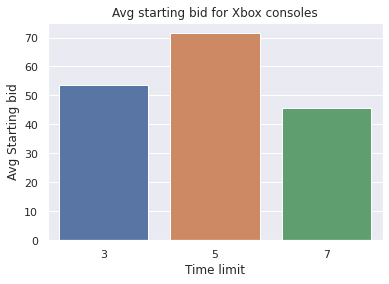

In [14]:
ax1 = sns.barplot(x="Time limit", y="Avg Starting bid", data=xbox_df).set(title='Avg starting bid for Xbox consoles')

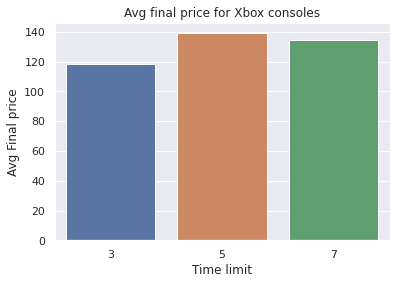

In [15]:
ax2 = sns.barplot(x="Time limit", y="Avg Final price", data=xbox_df).set(title='Avg final price for Xbox consoles')

5 day auctions of Xbox consoles have a much higher initial listing price, around 72 USD compared to 3 day at around 53 USD and 7 day at around 45 USD. The final price of each console does not reflect this, as the 5 and 7 day auctions are similar in final price, while 3 day auctions average an approximately 16% lower final price. Keep in mind that the standard deviations for both initial and final prices are quite high, so the actual price can vary quite a bit.

## Cartier watches

In [16]:
print("Watch statistics")
display(watch_df)

Watch statistics


,Time limit,Avg Starting bid,Avg Final price,pStd,fStd
0,3,283.777222,630.856667,331.350586,652.762131
1,5,393.688571,864.079048,640.753161,713.383840
2,7,391.786907,936.069278,663.755612,882.121256


Notice that the standard deviations can be quite large - this is due to the drastically different starting prices on some auctions. Certain Cartier watches have an initial listing price of around 180 USD, while others are listed at 2000 USD.

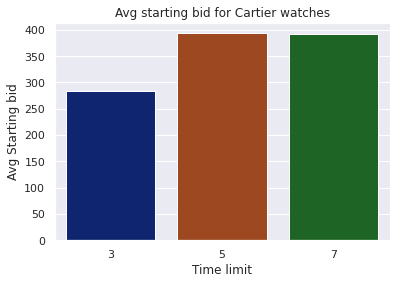

In [17]:
sns.set_theme(palette="dark")
ax1 = sns.barplot(x="Time limit", y="Avg Starting bid", data=watch_df).set(title='Avg starting bid for Cartier watches')

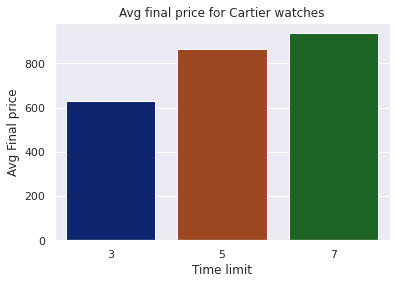

In [18]:
ax2 = sns.barplot(x="Time limit", y="Avg Final price", data=watch_df).set(title='Avg final price for Cartier watches')

## Percent increases on each auction

,Time limit,Percent increase
0,3,220.739183
1,5,194.528086
2,7,295.223830


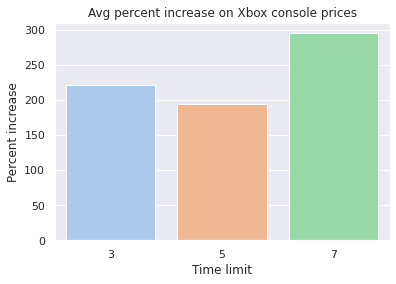

In [19]:
display(xbox_df_p)
sns.set_theme(palette="pastel")
ax1 = sns.barplot(x="Time limit", y="Percent increase", data=xbox_df_p).set(title='Avg percent increase on Xbox console prices')

,Time limit,Percent increase
0,3,222.307013
1,5,219.482888
2,7,238.923063


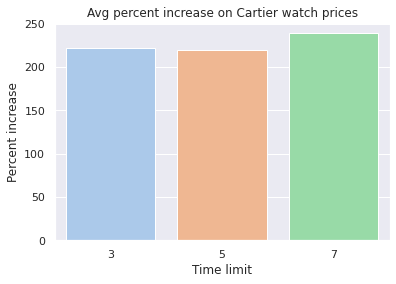

In [26]:
display(watch_df_p)
sns.set_theme(palette="pastel")
ax1 = sns.barplot(x="Time limit", y="Percent increase", data=watch_df_p).set(title='Avg percent increase on Cartier watch prices')

# Conclusion

From the data we can conclude that the optimal amount of time to list an auction for is 7 days. 

While the average final sale value of Xbox consoles for 7 days is lower than 5 days, the increase in price from initial post to sale is substantially higher for 7 days(295%) than 5 days(220%). If auctioneers were to post their 7 day auctions for similar initial price to 5 day auctions, the final value would likely be much higher.

Cartier watches express the same pattern, though with a less severe difference. While 7 day auctions produce the highest relative price increases, 3 and 5 day auction gains are right behind 7 days. 7 day auctions also boast much higher final prices.